## Tomato Disease classification

In [1]:
# Importing Dependencies
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
import numpy as np

In [2]:
# declaring constants
BATCH_SIZE = 32
IMAGE_SIZE = 96
CHANNELS=3
plt.figure(figsize=(16,8))

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

In [3]:
# used image_dataset_from_directory api to load all images
tomato_df = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\HP\Desktop\Tomato_DL",seed=123,shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 15118 files belonging to 10 classes.


In [4]:
tomato_df.class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [5]:
classification = tomato_df.class_names
# classification
# List of all classes names

In [6]:
# our dataframe
tomato_df

<BatchDataset shapes: ((None, 96, 96, 3), (None,)), types: (tf.float32, tf.int32)>

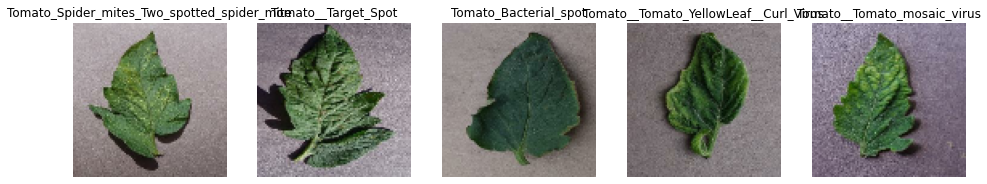

In [37]:
# some of the images from our dataset
plt.figure(figsize=(16,8))
for images, labels in tomato_df.take(1):
    for i in range(5):
        ax = plt.subplot(1, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(classification[labels[i]])
        plt.axis("off")

In [10]:
# Dataset is divided into 3 subsets
# 1. Training 2. Validation 3. Test

# len(tomato_df) # 473

# train_size = 0.8
# len(tomato_df)*train_size # 378.40000000000003

# train_ds = tomato_df.take(378) # 378

# test_ds = dataset.skip(378) # 95

# val_size=0.1
# len(dataset)*val_size # 47.300000000000004

# val_ds = test_ds.take(47) # 47

# test_ds = test_ds.skip(47) # 42

In [11]:
ds = tomato_df
train_split=0.8
val_split=0.1
test_split=0.1
shuffle=True
shuffle_size=10000
ds_size = len(tomato_df) # 473
if shuffle:
    tomato_df = tomato_df.shuffle(shuffle_size, seed=12)

train_size = int(train_split * ds_size) # 378
val_size = int(val_split * ds_size) # 47

train_ds = tomato_df.take(train_size) # 378
val_ds = tomato_df.skip(train_size).take(val_size)  # 47
test_ds = tomato_df.skip(train_size).skip(val_size) # 42

In [12]:
# cache improves the performance of pipeline taking img from disk and store in it's cache
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.experimental.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [14]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

In [15]:
cnn = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax'),
])
cnn.build(input_shape=input_shape)

In [16]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (32, 96, 96, 3)           0         
_________________________________________________________________
conv2d (Conv2D)              (32, 94, 94, 32)          896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 47, 47, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 45, 45, 64)          18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 22, 22, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 20, 20, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (32, 10, 10, 64)         

In [17]:
cnn.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [20]:
final = cnn.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=10,
)

Epoch 1/10
378/378 [==============================] - 247s 652ms/step - loss: 1.4334 - accuracy: 0.4955 - val_loss: 0.7757 - val_accuracy: 0.7354
Epoch 2/10
378/378 [==============================] - 188s 497ms/step - loss: 0.6631 - accuracy: 0.7727 - val_loss: 0.4553 - val_accuracy: 0.8471
Epoch 3/10
378/378 [==============================] - 194s 514ms/step - loss: 0.4366 - accuracy: 0.8466 - val_loss: 0.2794 - val_accuracy: 0.9116
Epoch 4/10
378/378 [==============================] - 216s 571ms/step - loss: 0.3402 - accuracy: 0.8828 - val_loss: 0.3929 - val_accuracy: 0.8723
Epoch 5/10
378/378 [==============================] - 245s 649ms/step - loss: 0.2845 - accuracy: 0.9030 - val_loss: 0.2632 - val_accuracy: 0.9102
Epoch 6/10
378/378 [==============================] - 204s 539ms/step - loss: 0.2304 - accuracy: 0.9184 - val_loss: 0.1882 - val_accuracy: 0.9309
Epoch 7/10
378/378 [==============================] - 191s 506ms/step - loss: 0.2012 - accuracy: 0.9291 - val_loss: 0.2034 -

In [21]:
scores = cnn.evaluate(test_ds)

48/48 [==============================] - 7s 138ms/step - loss: 0.1288 - accuracy: 0.9538


In [22]:
# Got accuracy of 95%, quite good
scores

[0.1288243532180786, 0.9537760615348816]

In [23]:
final.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [24]:
acc = final.history['accuracy']
val_acc = final.history['val_accuracy']
loss = final.history['loss']
val_loss = final.history['val_loss']

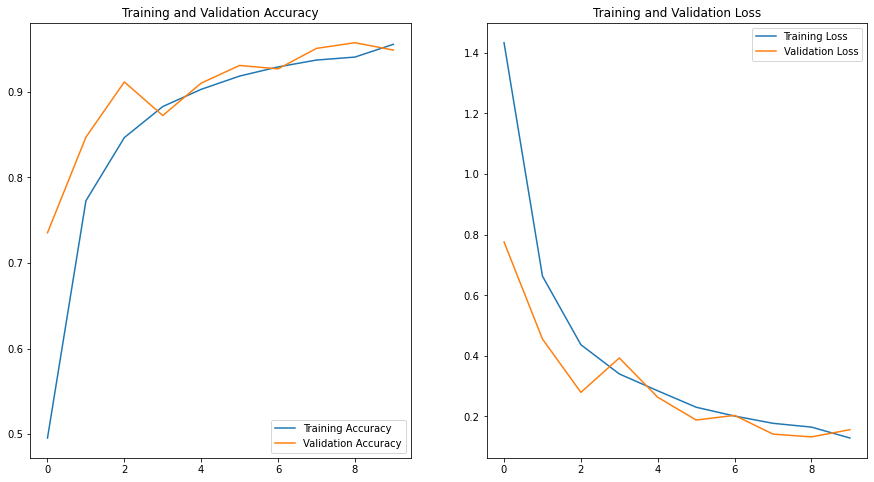

In [35]:
# Plotting the Accuracy and Loss Curves
plt.figure(figsize=(15, 8))
EPOCHS = 10
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

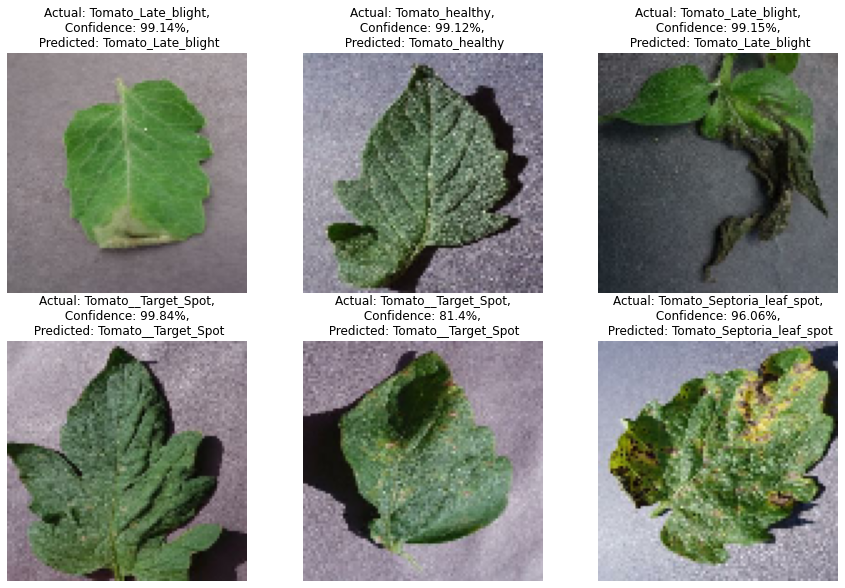

In [36]:
# Checking for sample images
import numpy as np
plt.figure(figsize=(15, 15))
for images_batch, labels_batch in test_ds.take(1):
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
        img_array = tf.expand_dims(img_array, 0)
        predictions = cnn.predict(img_array)
        predicted_class = classification[np.argmax(predictions[0])]
        confidence = round(100 * (np.max(predictions[0])), 2)
        actual_class = classification[labels[i]]
        
        plt.axis("off")
        plt.title(f"Actual: {actual_class},\n Confidence: {confidence}%, \n Predicted: {predicted_class}")
        

In [ ]:
# Uncomment below code to save the model
# cnn.save(r"C:\Users\HP\Desktop\Tomato_model\0")
# cnn.save(r"C:\Users\HP\Desktop\Tomato_model\tomato.h5")